# 使用单隐层神经网络进行分类

## 1 packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(1)

0.5
0.7310585786300049
sigmoid([0, 2]) = [0.5        0.88079708]


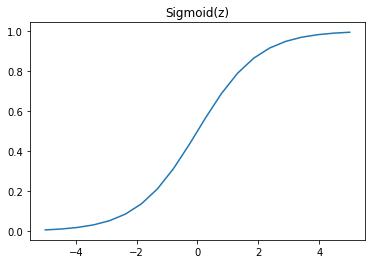

In [2]:
def sigmoid(z):
    """
    计算Sigmoid 函数
    Parameters
    ----------
    z : 标量或者任意形状数组

    Returns
    -------
    s : sigmod(z)

    """
    s=1.0/(1.0+np.exp(-z))
    return s

z=np.linspace(-5,5,20)
%matplotlib inline
s=sigmoid(z)

plt.plot(z,s)
plt.title("Sigmoid(z)")

print(sigmoid(0))
print(sigmoid(1))

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

## 2 Dataset

- numpy 命令
    - np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
    - np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等
    



###  如何实现花瓣算法
    - 层次1：将圆任意等分M的花瓣
    $r=sin(M \theta)$ $x=rcos(\theta)$ $y=r sin(\theta)$
    - 层次2：花瓣可以指定正负号
    - 层次3: 加上noise项


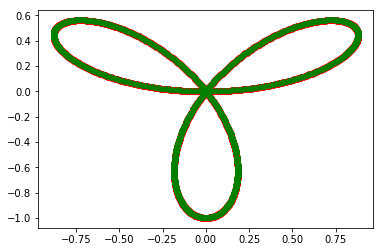

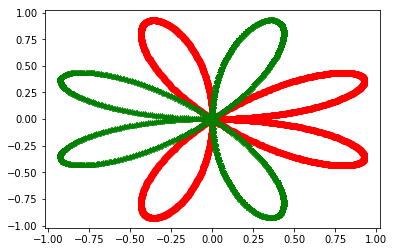

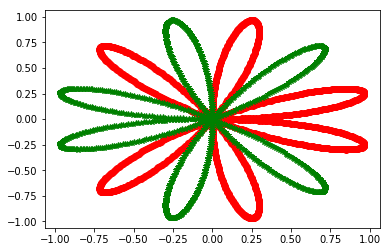

In [3]:
def plot_petal(m=1000,M=4):
    """
    绘制花瓣
    
    Parameters
    ----------
    m : 样本数量
    M : 花瓣数量(>=3)            
    """
    assert M>=3
    np.random.seed(1)
    # 计算 半径和角度    
    for i in range(2):        
        t=np.linspace(i*np.pi,(i+1)*np.pi,m)
        r=np.sin(M*t)
        #  计算x y
        x=r*np.cos(t) 
        y=r*np.sin(t)
        plt.plot(x,y,color='r' if i%2==0 else 'g',marker='o' if i%2==0 else '*')
    plt.show()
    
plot_petal(M=3)    
plot_petal(M=4)    
plot_petal(M=6)    

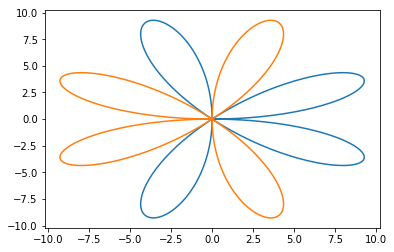

(2, 1000) (1, 1000)


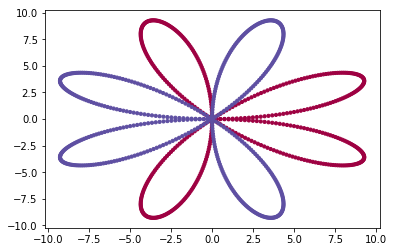

In [4]:
def plot_petal_v2(m=1000,A=10,M=4,D=2,C=2):
    """
    绘制花瓣
    
    Parameters
    ----------
    m : 样本数量
    A : max ray 最大径    
    M : 花瓣数量(>=3)  
    D:  维度
    C:  类别
    
    """

    N=int(m/C) # 单个类别样本数量
    X=np.zeros(shape=(m,D))
    Y=np.zeros(shape=(m,1))

    s_angle=2*np.pi/C # 单个类别角度分区
    s_sample=int(m/C) #单个类别样本数量



    for i in range(C):    
        ix=range(s_sample*i,s_sample*(i+1))
        t=np.linspace(s_angle*(i),s_angle*(i+1),len(ix))
        r=np.sin(M*t)
        x=A*r*np.cos(t) 
        y=A*r*np.sin(t)
        plt.plot(x,y)

#         X[ix]=np.concatenate([x.reshape(-1,1),y.reshape(-1,1)],axis=1)
        X[ix]=np.c_[x.reshape(-1,1),y.reshape(-1,1)]
        Y[ix]=i
    plt.show()
    
#     from IPython.core.debugger import Tracer; Tracer()()

    X=X.T
    Y=Y.T
    return X,Y
    
    
X,Y=plot_petal_v2()    
print(X.shape,Y.shape)    

plt.scatter(x=np.squeeze(X[0,:]), y=np.squeeze(X[1,:]),c=np.squeeze(Y),s=10,cmap=plt.cm.Spectral)
plt.show()

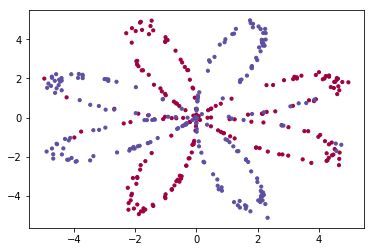

X shape=(2, 400)
Y shape=(1, 400)
trainin sample =400


In [5]:
def load_planar_dataset():
    np.random.seed(1)
    m=400
    A=5
    M=4
    D=2
    C=2


    N=int(m/C) # 单个类别样本数量
    X=np.zeros(shape=(m,D))
    Y=np.zeros(shape=(m,1))

    s_angle=2*3.12/C # 单个类别角度分区
    s_sample=int(m/C) #单个类别样本数量



    for i in range(C):    
        ix=range(s_sample*i,s_sample*(i+1))
        t=np.linspace(s_angle*(i),s_angle*(i+1),len(ix))+np.random.randn(len(ix))*0.2
        r=A*np.sin(M*t)+np.random.randn(len(ix))*0.2
        x=r*np.cos(t) 
        y=r*np.sin(t)
    #         plt.plot(x,y)

    #         X[ix]=np.concatenate([x.reshape(-1,1),y.reshape(-1,1)],axis=1)
        X[ix]=np.c_[x.reshape(-1,1),y.reshape(-1,1)]
        Y[ix]=i
    #     plt.show()

    #     from IPython.core.debugger import Tracer; Tracer()()

    X=X.T
    Y=Y.T
    return X,Y

X,Y=load_planar_dataset()

plt.scatter(x=np.squeeze(X[0,:]), y=np.squeeze(X[1,:]),c=np.squeeze(Y),s=10,cmap=plt.cm.Spectral)
plt.show()


shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]

print("X shape={}".format(shape_X))
print("Y shape={}".format(shape_Y))
print("trainin sample ={}".format(m))


## 3 调用scikit-learn的Logistic Regression

- 思考点： 基本步骤划分
    - 建立分类器
    - fit model（注意输入数据的格式）
        - X 维度= (sample,dim）
        - Y 维度= (sample,1)
    - predict data
- 知识点：
    - 0 1结果的accuracy 准确率计算 ```np.dot(y,y_hat)+np.dot(1-y,1-y_hat)```
    - numpy.meshgrid 输入x轴y轴的值，返回每一个交叉点的坐标
    - matplotlib.pyplot.contourf 绘制轮廓图
    - numpy.ravel 散开为flat array

In [6]:
lr_clf=sklearn.linear_model.LogisticRegressionCV()
lr_clf.fit(X.T,np.squeeze(Y))
lr_predictions=lr_clf.predict(X.T)
lr_accuracy=(np.dot(lr_predictions,np.squeeze(Y))+np.dot(1-lr_predictions,1-np.squeeze( Y)))/float(Y.size)
print("accuracy={:,.1%}".format(lr_accuracy))

accuracy=47.2%


#### 绘制 decision boundary

- 思路：
    - 输入 model(只是用来预测结果的),X,y
    - 基本思路：（1）选定背景范围，并grid分割（2）将所有的点预测出结果，并画出来（需要画出区域性）（3）画出输入的点
    - 出现的错误点： 重要的是绘制出边界，而不是将区域渲染；前者会让人联想到用 contour 来表示



#### 遇到问题
- 无法按照区域显示颜色，应该是`plt.contourf`有问题
    - 原因：函数使用错误，之前用的是`plt.contour`， 而不是`plt.contourf`


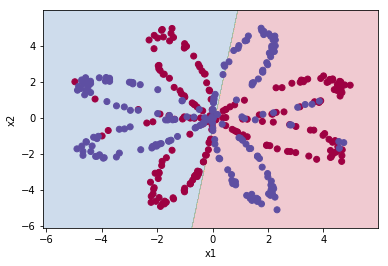

In [7]:
def plot_decision_boundary(model,x,y):
    """
    绘制2d的决策边界
    
    Parameters
    ----------
    model : 预测模型，输入x，输出y_hat
    x: 输入x（2d）
    y: 输入真实y            
    """
 
    # meshgrid方法
    x_min,x_max=x[0:,].min()-1,x[0:,].max()+1
    y_min,y_max=x[1:,].min()-1,x[1:,].max()+1
    h=0.01
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    # 预测并绘图
    #     zz=(model(np.c_[xx.reshape(-1,1),yy.reshape(-1,1)])).reshape(xx.shape[0],-1)
    # 更优雅的实现方式     
    zz=model(np.c_[xx.ravel(),yy.ravel()])
    zz=zz.reshape(xx.shape)    
    plt.contourf(xx,yy,zz,cmap=plt.cm.Spectral,alpha=0.25) 
    plt.xlabel('x1')
    plt.ylabel('x2')
    # 绘制输入点
    plt.scatter(x=x[0,:], y=x[1,:],c=y.ravel(),cmap=plt.cm.Spectral,alpha=1)
#     plt.show()

plot_decision_boundary(lambda x:lr_clf.predict(x),X,Y)


## 4 实现单隐层的神经网络

- 理论部分
<img src='my_files/neural network forward and back propagation.jpg' style="width:650px;height:900px;">




- 程序架构（相比W2多了一层，主要复杂度体现在正向和反向传播）

In [8]:
# 获取维度
def layer_sizes(X,Y,hidden_unit=4):
    """
    获取layer 尺寸
    

    Parameters
    ----------
    X :  输入数据X (n_dim,samples)
    Y :  label数据(out_size,sampless)

    Returns
    -------
    n_x : 输入层尺寸
    n_h : 隐藏层尺寸
    n_y : 输出层尺寸
    """
    
    n_x=X.shape[0]
    n_h=hidden_unit
    n_y=Y.shape[0]
    
    return (n_x,n_h,n_y)


# 验证结果
def layer_size_test_case():
    np.random.seed(1)
    X_asses=np.random.randn(5,3)
    Y_asses=np.random.randn(2,3)
    return X_asses,Y_asses

X_asses,Y_asses= layer_size_test_case()
(n_x,n_h,n_y) = layer_sizes(X_asses,Y_asses)
print("n_x,n_h,n_y={},{},{}".format(n_x,n_h,n_y))    


n_x,n_h,n_y=5,4,2


In [9]:
#  初始化
def initialize_parameters(n_x,n_h,n_y):    
    """
    初始化参数 w 均值为0.001 b 为0
    

    Parameters
    ----------
    n_x : 输入层尺寸
    n_h : 隐藏层尺寸
    n_y : 输出层尺寸

    Returns
    -------
    params : 输出参数 dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1)    
    """
    np.random.seed(2)
    W1=np.random.rand(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.rand(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))        
    
    params={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
    }
    return params


def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))    

W1 = [[0.00435995 0.00025926]
 [0.00549662 0.00435322]
 [0.00420368 0.00330335]
 [0.00204649 0.00619271]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[0.00299655 0.00266827 0.00621134 0.00529142]]
b2 = [[0.]]


In [10]:
# 正向传播
def forward_progagation(X,params):
    """
    正向传播
    
    Parameters
    ----------
    X :  输入数据X (n_dim,samples)    
    params : 输出参数 dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1)  


    Returns
    -------
    A2: 预测结果     
    cache : dict形式
        Z1
        A2
        Z2
        A2            
    """
    # 提取参数     
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']
    
    # 计算结果
    Z1=np.matmul(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.matmul(W2,A1)+b2
    A2=sigmoid(Z2)
    
    # 存储中间结果
    cache={
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2                
    }
    
    return A2,cache
    
    
    

def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    b1 = np.random.randn(4,1)
    b2 = np.array([[ -1.3]])

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}

    return X_assess, parameters
X_assess, parameters=forward_propagation_test_case()
A2,cache=forward_progagation(X_assess, parameters)

print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


#### 【每个步骤都要检查，不过保留一些必要的验算算例可以提高效率】

In [11]:
# 计算损失函数
def compute_cost(A2,Y,parameters):
    """
    计算损失函数
    
    Parameters
    ----------
    A2:  
    Y : 

    Returns
    -------
    cost :         
    """
    m=Y.shape[1]
    cost=-(np.dot(np.log(A2.ravel()),Y.ravel())+np.dot((np.log(1-A2.ravel())),1-Y.ravel()))/m
    
    # dim check
    assert( isinstance(cost,float))
    
    return cost
    
def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return a2, Y_assess, parameters

    
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess,parameters)))    

cost = 0.6930587610394646


#### 遇到错误
- 问题1 ：
    - 描述
    ```
    47     dZ1=np.multiply(np.matmul(W2,dZ2),1-np.tanh(Z1)**2) 
    ValueError: shapes (1,4) and (1,3) not aligned: 4 (dim 1) != 1 (dim 0) 
    ```
    - 原因分析:维度分析 W2 应为 W2.T
    - 思考点： 算法实现过程中，第一步保证公式正确，第二步用简单算例保证结果正确，最后一步才是编程实现并验证。不然会出问题的。

In [12]:
#     计算反向传播    
def backward_propagation(params,cache,X,Y):
    """
    计算反向传播    
    

    Parameters
    ----------
    X: input data
    Y : 真实值
    params :  dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1)                    
    cache : dict形式
        Z1
        A1
        Z2
        A2      

    Returns
    -------
    grads : dict 形式
        dW1 (n_h,n_x)
        db1 (n_h,1)
        dW2 (n_y,n_h)
        db2 (n_y,1)               
    """
    # 取出参数     
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']    
    
    Z1=cache['Z1']
    A1=cache['A1']
    Z2=cache['Z2']
    A2=cache['A2']    

    # 计算过程
    m=Y.shape[1]
    dZ2=A2-Y
    dW2=np.matmul(dZ2,A1.T)/m
    db2=np.sum(dZ2,axis=1,keepdims=True)/m
    
    dZ1=np.multiply(np.matmul(W2.T,dZ2),1-np.tanh(Z1)**2)
    dW1=np.matmul(dZ1,X.T)/m
    db1=np.sum(dZ1,axis=1,keepdims=True)/m
    
    # 维度校验     
#     assert (dW1.shape== (n_h,n_x))
#     assert (db1.shape== (n_h,1))
#     assert (dW2.shape== (n_y,n_h))
#     assert (db2.shape== (n_y,1)  )   
    assert (dW1.shape==W1.shape)
    assert (db1.shape==b1.shape)
    assert (dW2.shape==W2.shape)
    assert (db2.shape==b2.shape)


    # 输出结果
    grads={
        'dW1':dW1,
        'db1':db1,
        'dW2':dW2,
        'db2':db2
    }
    
    return grads
    
    
def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess    
    
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))    
    


dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [13]:
# 参数更新
def update_parameters(params,grads,learning_rate = 1.2):
    """
    更新系数
    

    Parameters
    ----------
    params :  dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1)                    
    grads : dict 形式
        dW1 (n_h,n_x)
        db1 (n_h,1)
        dW2 (n_y,n_h)
        db2 (n_y,1)        

    Returns
    -------
    params :  dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1) 
            
    """
    # 取出参数
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']
    
    dW1=grads['dW1']
    db1=grads['db1']
    dW2=grads['dW2']
    db2=grads['db2']
    
    # 进行计算     
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2    
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
        
    params={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
    }
    return params
def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))    
    




W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [14]:
# 组装成模型
def nn_model(X,Y,n_h,num_iterations=10000,learning_rate=1.2,print_cost=False):
    """
    组成模型
    
    Parameters
    ----------
    X: input data
    Y :真实值
    n_h : 隐藏层数目    
    num_iterations： 循环次数
    print_cost : 是否打印cost

    Returns
    -------
    params :  dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1) 
    costs:  
    """
    
    # 初始化
    np.random.seed(3)    
    n_x, n_h, n_y =layer_sizes(X,Y,hidden_unit=n_h)
    params=initialize_parameters(n_x, n_h, n_y)
    costs=[]
    # 循环过程
    for i in range(num_iterations):        
        # forward
        A2,cache=forward_progagation(X,params)
        # compute cost        
        if i%100==0:
            cost=compute_cost(A2, Y, parameters)
            costs.append(cost)
            if print_cost:
                print("cost after {} iterations, cost={}".format(i,cost))
        # backward
        grads=backward_propagation(params, cache, X, Y)
        # update
        params=update_parameters(params, grads, learning_rate)
    return params,costs



def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    return X_assess, Y_assess


X_assess, Y_assess = nn_model_test_case()
parameters,costs = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


cost after 0 iterations, cost=0.6931751837653422
cost after 100 iterations, cost=0.00285579594882493
cost after 200 iterations, cost=0.001267196774068359
cost after 300 iterations, cost=0.0008071856788177071
cost after 400 iterations, cost=0.000590403513421087
cost after 500 iterations, cost=0.00046472792396543857
cost after 600 iterations, cost=0.00038284646656050453
cost after 700 iterations, cost=0.0003253255737133362
cost after 800 iterations, cost=0.00028273096520196433
cost after 900 iterations, cost=0.0002499354989937038
cost after 1000 iterations, cost=0.00022391539708178617
cost after 1100 iterations, cost=0.00020277303851359428
cost after 1200 iterations, cost=0.00018525786261429733
cost after 1300 iterations, cost=0.0001705125082047546
cost after 1400 iterations, cost=0.00015792969058668613
cost after 1500 iterations, cost=0.0001470673084318018
cost after 1600 iterations, cost=0.00013759591049296045
cost after 1700 iterations, cost=0.0001292649982983325
cost after 1800 itera

In [15]:
# 预测
def predict(params,X):
    """
    预测
    
    Parameters
    ----------
    params :  dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1) 
    X 输入数据

    Returns
    -------
    Y_hat : 预测值（0，1）         
    """
    A2,cache=forward_progagation(X,params)
    Y_hat=A2>0.5
    return Y_hat
    

def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))    

predictions mean = 0.6666666666666666


In [16]:
parameters,costs=nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=True)

cost after 0 iterations, cost=0.693161261597226
cost after 100 iterations, cost=0.36809948115364705
cost after 200 iterations, cost=0.32251197709998053
cost after 300 iterations, cost=0.30947304992151586
cost after 400 iterations, cost=0.3021998343112169
cost after 500 iterations, cost=0.2971807337079413
cost after 600 iterations, cost=0.29332805251894806
cost after 700 iterations, cost=0.2901737728064817
cost after 800 iterations, cost=0.28747755356468174
cost after 900 iterations, cost=0.2851029108795661
cost after 1000 iterations, cost=0.28296828074307034
cost after 1100 iterations, cost=0.2810240981293135
cost after 1200 iterations, cost=0.27923994046780976
cost after 1300 iterations, cost=0.2775961256160603
cost after 1400 iterations, cost=0.27607834380321317
cost after 1500 iterations, cost=0.2746748554866536
cost after 1600 iterations, cost=0.2733753712539147
cost after 1700 iterations, cost=0.27217068386610554
cost after 1800 iterations, cost=0.2710525227316525
cost after 1900 

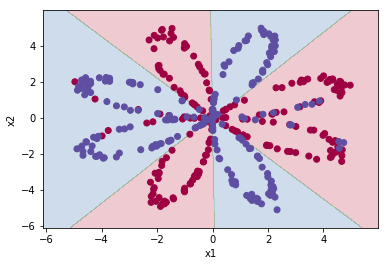

In [17]:
plot_decision_boundary(model=lambda x:predict(parameters,x.T),x=X,y=Y)

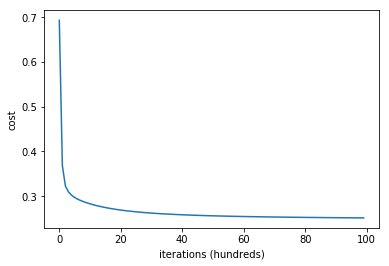

In [18]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
plt.show()

In [19]:
# 输出预测值
predictios=predict(parameters,X)
accuracy=1-np.sum(np.logical_xor(predictios,Y))/Y.size
print("accuracy={:,.2%}".format(accuracy))



accuracy=90.75%


#### 绘图

2 hidden units, accuracy=67.00%
3 hidden units, accuracy=91.00%
4 hidden units, accuracy=90.75%
5 hidden units, accuracy=91.00%
20 hidden units, accuracy=92.50%
50 hidden units, accuracy=92.50%


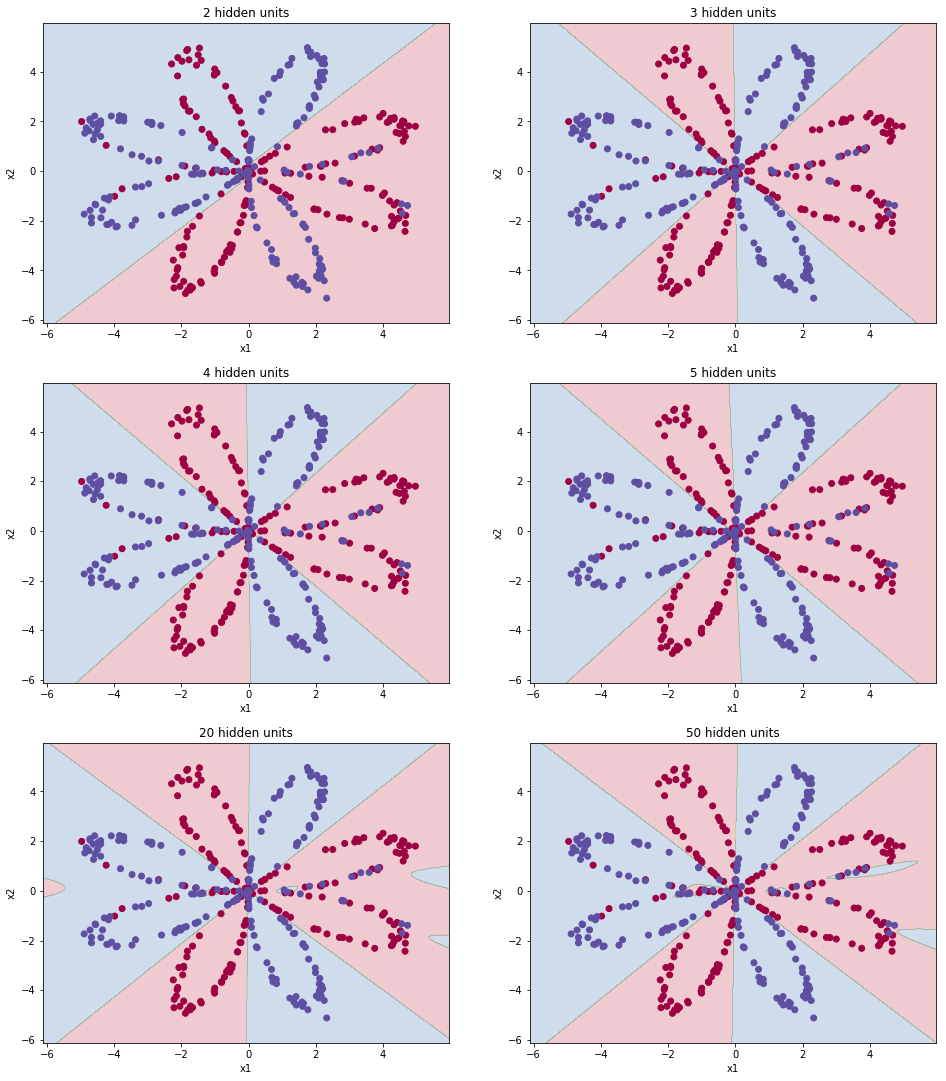

In [20]:
# 调整hidden uinit,绘制结果
plt.figure(figsize=(16,32))
hidden_layer_sizes= [2,3,4,5,20,50]
costs_dict={}
for i,n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title("{} hidden units".format(n_h ))
    parameters,costs=nn_model(X,Y,n_h=n_h,num_iterations=10000,print_cost=False)
    predictios=predict(parameters,X)
    accuracy=1-np.sum(np.logical_xor(predictios,Y))/Y.size
    print("{} hidden units, accuracy={:,.2%}".format(n_h ,accuracy))
    plot_decision_boundary(model=lambda x:predict(parameters,x.T),x=X,y=Y)
    costs_dict[n_h]=costs
   

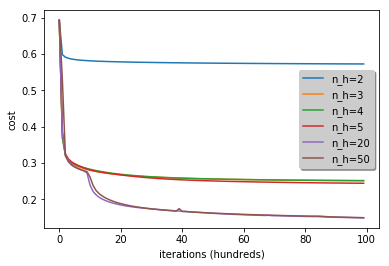

In [21]:
for n_h in costs_dict.keys():
    plt.plot(costs_dict[n_h],label='n_h={}'.format(n_h))
    plt.ylabel('cost')
    plt.xlabel('iterations (hundreds)')
    legend=plt.legend(loc='best',shadow=True)
    frame=legend.get_frame()
    frame.set_facecolor('0.8')
plt.show()

#### 遇到问题 
- 描述

```
    51     # 维度校验
---> 52     assert (dW1.shape== (n_h,n_x))

AssertionError: 
```
- 原因描述 `assert (dW1.shape== (n_h,n_x))` 中n_h并未在函数中定义，属于全部变量，可以修改为`    assert (dW1.shape==W1.shape)`
 

noisy_circles


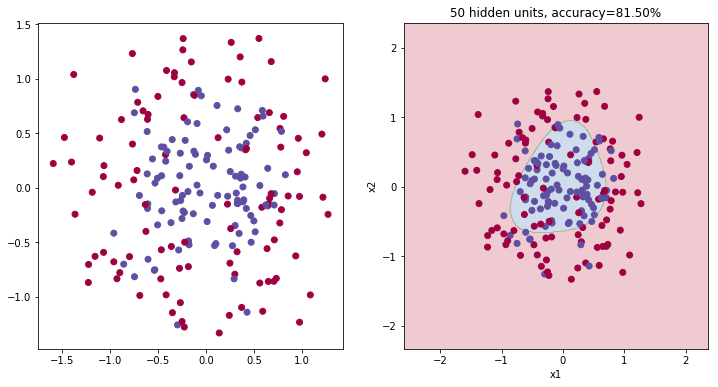

noisy_moons


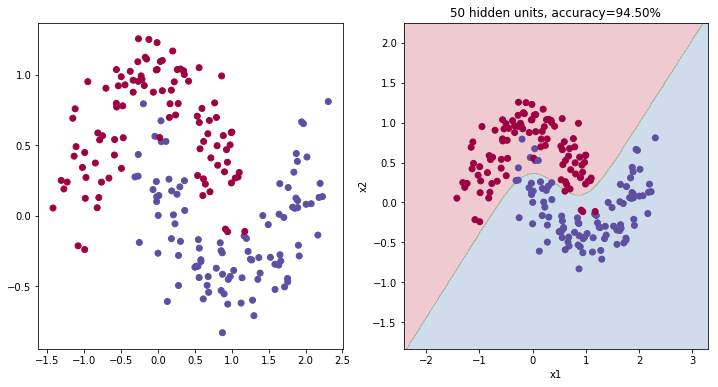

blobs


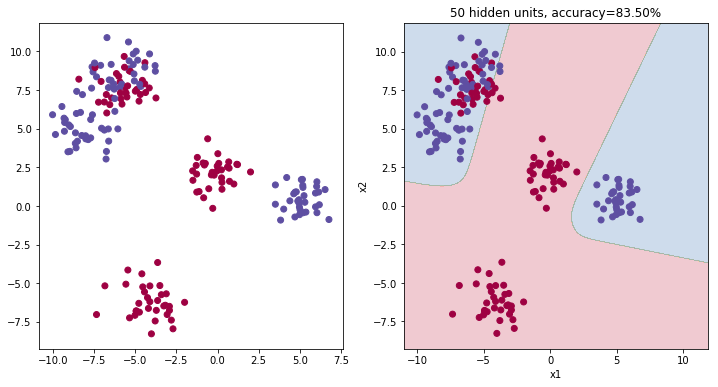

gaussian_quantiles


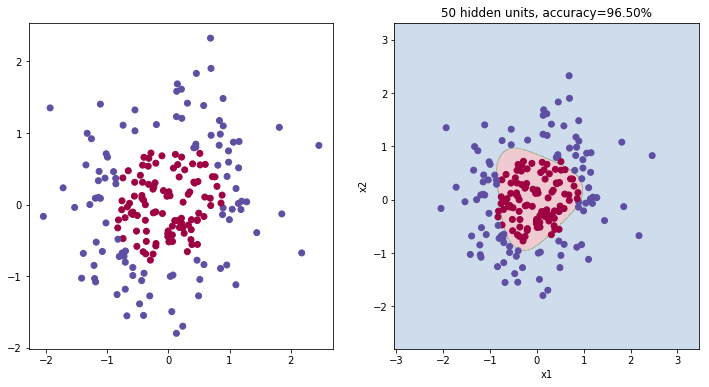

no_structure


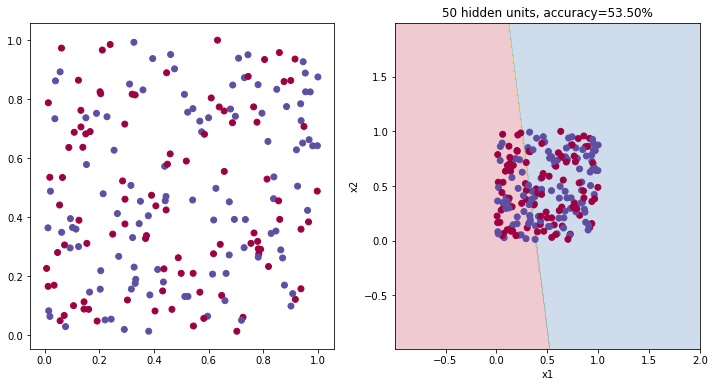

In [39]:
# 测试其他数据集并绘制decisio boundary
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 1)>0.5
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure=load_extra_datasets()
dataset={}
dataset['noisy_circles']=noisy_circles
dataset['noisy_moons']=noisy_moons
dataset['blobs']=blobs
dataset['gaussian_quantiles']=gaussian_quantiles
dataset['no_structure']=no_structure

# 绘图显示

for idx,data in dataset.items():
    print(idx)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    X,Y=data
    X,Y=X.T,Y.reshape(1,-1)
    if idx=='blobs':
        Y=Y%2            
    plt.scatter(X[0,:],X[1,:],c=Y.ravel(),cmap=plt.cm.Spectral)
    plt.subplot(1,2,2)

    parameters,costs=nn_model(X,Y,n_h=4,num_iterations=10000,learning_rate=0.1,print_cost=False)
    predictios=predict(parameters,X)
    accuracy=1-np.sum(np.logical_xor(predictios,Y))/Y.size
    plt.title("{} hidden units, accuracy={:,.2%}".format(n_h ,accuracy))
    plot_decision_boundary(model=lambda x:predict(parameters,x.T),x=X,y=Y)    
    
    plt.show()

